<a href="https://colab.research.google.com/github/IYORIYAGAMI/OPEN-SOURCE/blob/main/Data_Science_Project_Day_1_%26_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset:
    
Telecom Churn Prediction Dataset
- Description: Contains customer information for a subscription-based service provider to predict customer churn (leaving the service).
- Columns: Includes customer details, services used, contract terms, and churn status.
- Purpose: Used for customer churn analysis, segmentation, and retention strategies.
- Applications: Churn prediction, customer satisfaction analysis, and targeted marketing.
- Analysis Tasks: EDA, data preprocessing, ML model building, evaluation, and model deployment.
- Relevance: A practical dataset for real-world data science and customer relationship management scenarios.

## Step 1: Importing Libraries

In [1]:
import numpy as np  # Import NumPy for numerical computations and handling arrays
import pandas as pd  # Import Pandas for data manipulation and analysis (e.g., reading CSV files)
import seaborn as sns  # Import Seaborn for advanced and visually appealing data visualizations
import matplotlib.ticker as mtick  # Import ticker module from Matplotlib to control tick formatting on axes
import matplotlib.pyplot as plt  # Import Matplotlib's pyplot for creating plots and charts
import warnings  # Import the warnings library to manage warning messages
warnings.filterwarnings("ignore")  # Suppress warning messages to keep the output clean


## Step 2: Loading the dataset

In [3]:
telecom_cust = pd.read_csv('/content/Telco_Customer_Churn.csv')

## Step 3: Data Preprocessing & EDA

In [4]:
telecom_cust.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
telecom_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
telecom_cust.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
telecom_cust.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [8]:
# Converting Total Charges to a numerical data type.

telecom_cust.TotalCharges = pd.to_numeric(telecom_cust.TotalCharges, errors='coerce')

In [9]:
# Checking for null values
telecom_cust.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [10]:
#Removing missing values

telecom_cust.dropna(inplace = True)

In [11]:
#Remove customer IDs from the data set

df2 = telecom_cust.iloc[:,1:]

In [12]:
#Convertin the predictor variable in a binary numeric variable

df2['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df2['Churn'].replace(to_replace='No',  value=0, inplace=True)

In [13]:
#Let's convert all the categorical variables into dummy variables

df_dummies = pd.get_dummies(df2)
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,True,False,False,True,True,...,False,True,False,False,False,True,False,False,True,False
1,0,34,56.95,1889.50,0,False,True,True,False,True,...,False,False,True,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,False,True,True,False,True,...,False,True,False,False,False,True,False,False,False,True
3,0,45,42.30,1840.75,0,False,True,True,False,True,...,False,False,True,False,True,False,True,False,False,False
4,0,2,70.70,151.65,1,True,False,True,False,True,...,False,True,False,False,False,True,False,False,True,False


<Axes: >

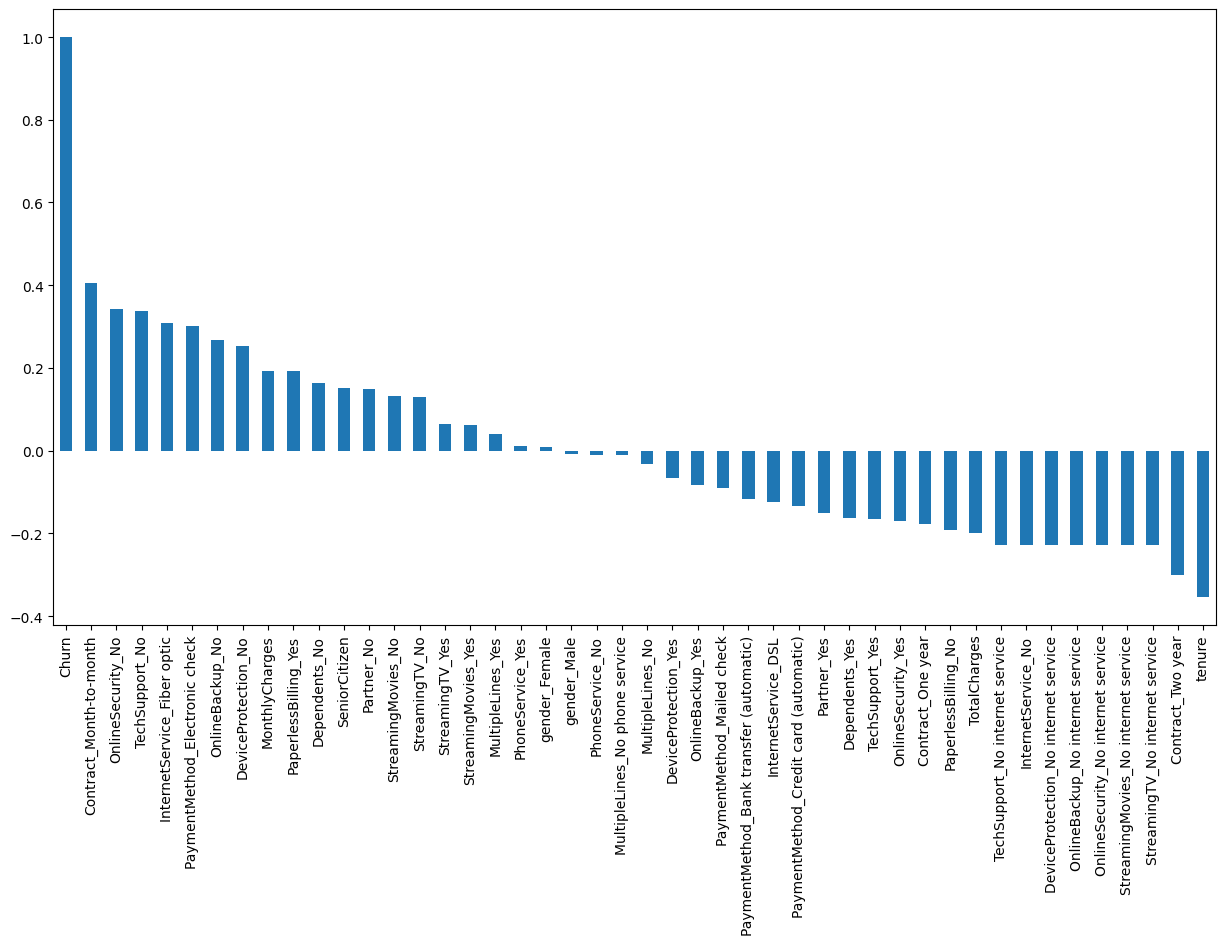

In [14]:
# Get Correlation of "Churn" with other variables

plt.figure(figsize=(15,8))  # Create a new figure for the plot with a specified size (width=15, height=8)

# Calculate the correlation of all variables with the 'Churn' column,
# sort them in descending order, and plot the correlations as a bar chart
df_dummies.corr()['Churn'].sort_values(ascending=False).plot(kind='bar')


### Intepretation

Month to month contracts, absence of online security and tech support seem to be positively correlated with churn.
While, tenure, two year contracts seem to be negatively correlated with churn.

Interestingly, services such as Online security, streaming TV, online backup, tech support, etc. without internet
connection seem to be negatively related to churn.

We will explore the patterns for the above correlations below before we delve into modelling and identifying
the important variables.

## Data Exploration

- To understand patterns & potentially form some hypothesis

### A) Demographic

- Gender, Age Range, Partner and Dependent status

------------------------------------------------------

1) Gender Distribution

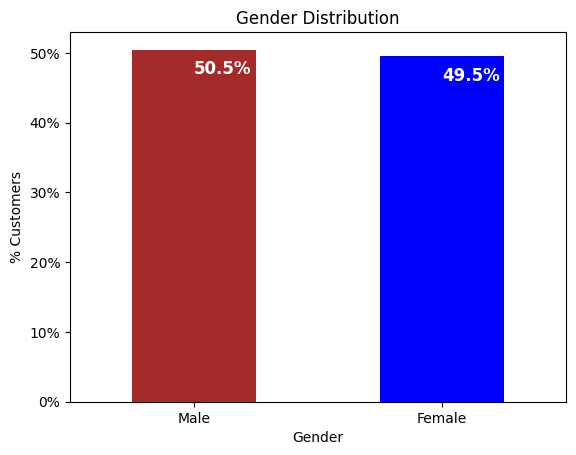

In [15]:
# Define a list of colors to be used for the bars in the plot
colors = ['brown', 'blue']

# Count the number of customers for each gender in the 'gender' column
gender_counts = telecom_cust['gender'].value_counts()

# Create a bar plot showing the percentage distribution of genders
ax = (gender_counts * 100.0 / len(telecom_cust)).plot(
    kind='bar',      # Specify the type of plot (bar chart)
    stacked=True,    # Stack bars (though here it’s not necessary with one variable)
    rot=0,           # Keep x-axis labels (gender names) horizontal
    color=colors     # Apply the defined colors to the bars
)

# Format the y-axis to display percentages instead of decimal numbers
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Label the y-axis
ax.set_ylabel('% Customers')

# Label the x-axis
ax.set_xlabel('Gender')

# Add a title to the chart
ax.set_title('Gender Distribution')

# Calculate total number of customers to compute percentages
total = gender_counts.sum()

# Iterate over each bar and its corresponding count to add percentage labels
for bar, count in zip(ax.patches, gender_counts):
    percentage = count / total * 100  # Calculate the percentage for each bar
    ax.text(
        bar.get_x() + bar.get_width() / 2,   # X-position: center of the bar
        bar.get_height() - 3.5,              # Y-position: slightly below the top of the bar
        f'{percentage:.1f}%',                # Display percentage with 1 decimal point
        fontsize=12,                         # Set font size
        color='white',                       # Use white color for visibility
        weight='bold'                        # Make text bold
    )

# Display the final bar plot
plt.show()

# ------------------------------------------------------------------------------
# SUMMARY:
# This code visualizes the gender distribution of telecom customers as a bar chart.
# It calculates the percentage of male and female customers, plots them using Matplotlib,
# formats the y-axis to show percentages, and adds percentage labels on each bar.
# The chart helps to quickly compare the proportion of customers by gender.
# ------------------------------------------------------------------------------


# ----->
- Almost half are male & other half are female

#
2) Senior Citizen (%)

Text(0.5, 1.0, '% of Senior Citizens')

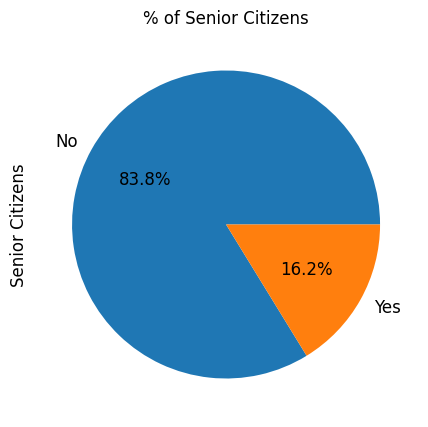

In [17]:
# Create a pie chart showing the percentage of senior citizens in the dataset
ax = (telecom_cust['SeniorCitizen'].value_counts() * 100.0 / len(telecom_cust)) \
.plot.pie(
    autopct='%.1f%%',        # Display percentage values with one decimal place on each slice
    labels=['No', 'Yes'],    # Define labels: 'No' for non-senior citizens, 'Yes' for senior citizens
    figsize=(5, 5),          # Set the size of the pie chart
    fontsize=12              # Set font size for labels
)

# Format the y-axis to show percentages (though in a pie chart it’s typically hidden)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Add a descriptive label to the y-axis
ax.set_ylabel('Senior Citizens', fontsize=12)

# Add a title to the pie chart
ax.set_title('% of Senior Citizens', fontsize=12)

# ------------------------------------------------------------------------------
# SUMMARY:
# This code creates a pie chart representing the proportion of senior citizens
# versus non-senior citizens in the telecom customer dataset. It calculates
# the percentage of each group, displays those percentages on the chart,
# and adds axis labels and a title for clarity. This helps visualize how
# much of the customer base is made up of senior citizens.
# ------------------------------------------------------------------------------


# ------>

- Only 16% are senior citizen, that means most of the customer are younger people

#
3) Partner and dependent status

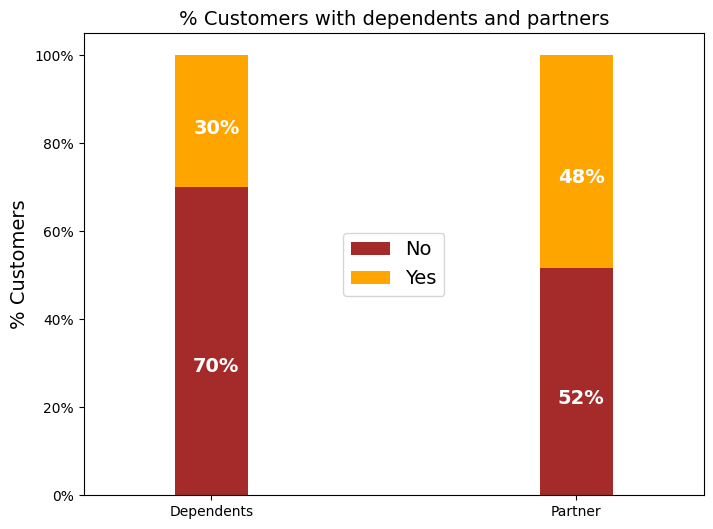

In [18]:
# Reshape the data to have one row per customer-variable pair (for Dependents and Partner columns)
df2 = pd.melt(
    telecom_cust,
    id_vars=['customerID'],               # Columns to keep fixed (customerID)
    value_vars=['Dependents', 'Partner']  # Columns to unpivot into variable-value pairs
)

# Group by variable (Dependents/Partner) and value (Yes/No), count occurrences, and reshape using unstack
df3 = df2.groupby(['variable', 'value']).count().unstack()

# Convert counts into percentages of total customers
df3 = df3 * 100 / len(telecom_cust)

# Define colors for the stacked bars
colors = ['brown', 'orange']

# Create a stacked bar chart showing the percentage of customers with/without dependents and partners
ax = df3.loc[:, 'customerID'].plot.bar(
    stacked=True,         # Combine Yes/No values in one bar
    color=colors,         # Apply custom colors
    figsize=(8, 6),       # Set figure size
    rot=0,                # Keep x-axis labels horizontal
    width=0.2             # Set bar width
)

# Format y-axis as percentages
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Label the y-axis
ax.set_ylabel('% Customers', size=14)

# Remove the x-axis label
ax.set_xlabel('')

# Set the plot title
ax.set_title('% Customers with dependents and partners', size=14)

# Display legend in the center with larger text
ax.legend(loc='center', prop={'size': 14})

# Add percentage labels on each bar segment for clarity
for p in ax.patches:
    width, height = p.get_width(), p.get_height()  # Get bar dimensions
    x, y = p.get_xy()                              # Get bar position
    ax.annotate(
        '{:.0f}%'.format(height),                  # Label with percentage (no decimals)
        (p.get_x() + 0.25 * width, p.get_y() + 0.4 * height),  # Position label inside bar
        color='white',                             # White text for contrast
        weight='bold',                             # Bold text
        size=14                                    # Font size
    )

# ------------------------------------------------------------------------------
# SUMMARY:
# This code visualizes the proportion of telecom customers who have dependents
# and/or partners. It reshapes the dataset using `pd.melt()` to prepare for grouping,
# calculates the percentage of 'Yes' and 'No' responses for each category, and
# plots them as stacked bars. Each bar represents one variable (Dependents or Partner),
# split into two segments showing the percentage of customers with and without them.
# The chart helps understand household-related customer demographics.
# ------------------------------------------------------------------------------


# ----->

About 50% of the customers have a partner, while only 30% of the total customers have dependents.

### B) Customer Account Information

- Tenure & contract

------------------------------------------

1) Tenure

Text(0.5, 1.0, 'No of Customers by their tenure')

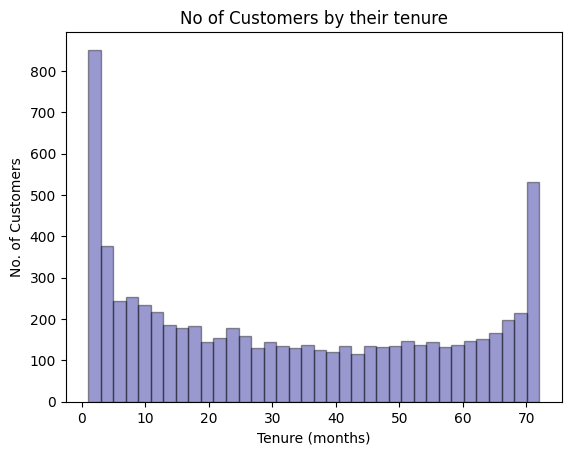

In [19]:
# Create a histogram showing the distribution of customer tenure (in months)
ax = sns.distplot(
    telecom_cust['tenure'],      # Column to visualize (customer tenure)
    hist=True,                   # Display the histogram bars
    kde=False,                   # Disable the Kernel Density Estimate curve (smooth line)
    bins=int(180/5),             # Number of bins (intervals) = 180 ÷ 5 = 36 bins
    color='darkblue',            # Set the color of the bars
    hist_kws={'edgecolor': 'black'},  # Add black borders around the bars for clarity
    kde_kws={'linewidth': 4}     # (Not used here since kde=False, but specifies line width if enabled)
)

# Label the y-axis to indicate number of customers
ax.set_ylabel('No. of Customers')

# Label the x-axis to represent customer tenure in months
ax.set_xlabel('Tenure (months)')

# Add a title to the histogram
ax.set_title('No of Customers by their tenure')

# ------------------------------------------------------------------------------
# SUMMARY:
# This code plots a histogram of customer tenure using Seaborn to show how long
# customers have stayed with the telecom company. The x-axis represents tenure
# (in months), and the y-axis shows the number of customers in each tenure range.
# The chart helps identify patterns such as short-term vs long-term customer retention.
# ------------------------------------------------------------------------------


#
2) Contracts

Text(0.5, 1.0, 'No. of Customers by Contract Type')

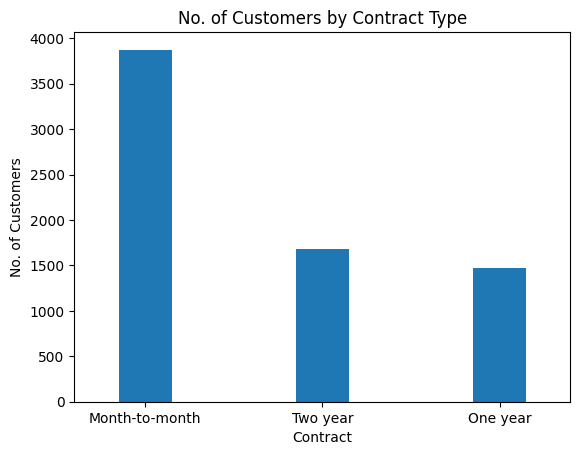

In [20]:
# Create a bar chart showing the number of customers by their contract type
ax = telecom_cust['Contract'].value_counts().plot(
    kind='bar',   # Specify the type of plot (bar chart)
    rot=0,        # Keep x-axis labels (contract types) horizontal
    width=0.3     # Set the width of the bars
)

# Label the y-axis to indicate the number of customers
ax.set_ylabel('No. of Customers')

# Add a title to the chart
ax.set_title('No. of Customers by Contract Type')

# ------------------------------------------------------------------------------
# SUMMARY:
# This code visualizes how many customers are subscribed under each contract type
# (e.g., Month-to-month, One year, Two year). It counts the occurrences of each
# contract type in the 'Contract' column and plots them as a bar chart. The chart
# helps identify which contract duration is most or least popular among customers.
# -------------------------


# ----->

Most of the customers are in the month to month contract while there are equal number of customers in the 1 year and 2 year contracts

Text(0.5, 1.0, 'Two Year Contract')

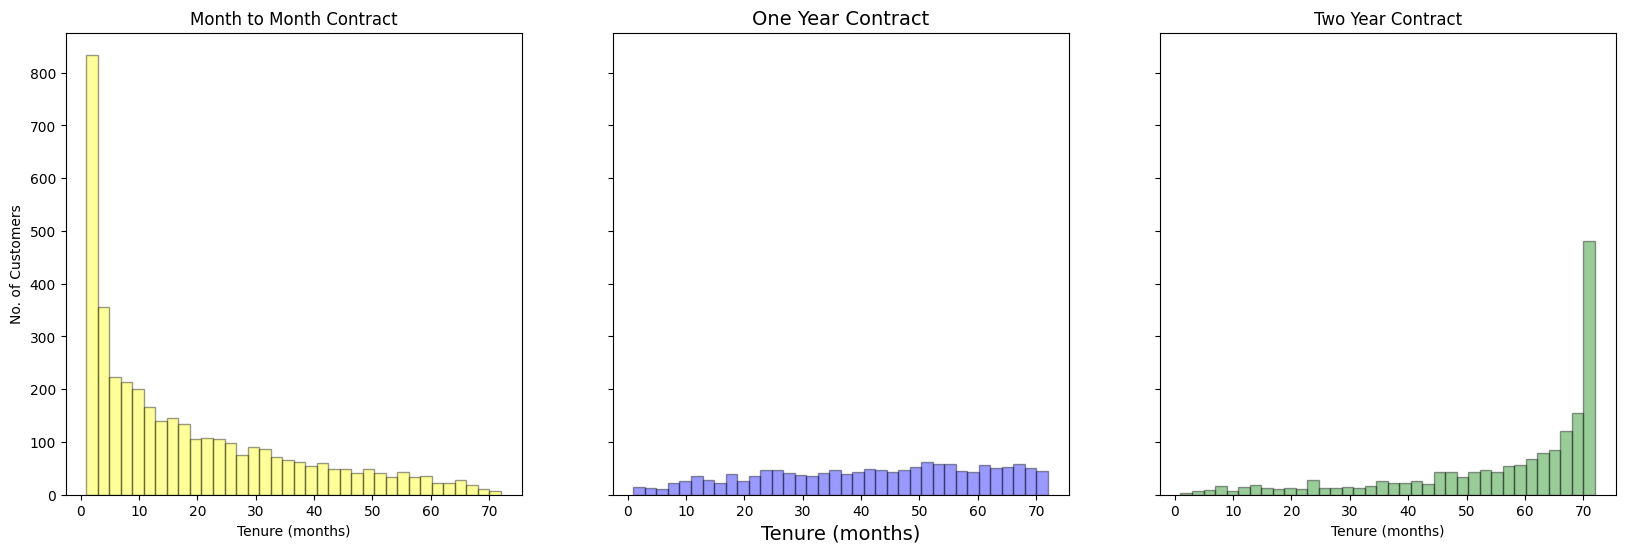

In [21]:
# Create a figure with 3 subplots (side by side) sharing the same y-axis
fig, (ax1, ax2, ax3) = plt.subplots(
    nrows=1, ncols=3, sharey=True, figsize=(20, 6)  # 1 row, 3 columns, shared y-axis, figure size
)

# ---------------------- Plot 1: Month-to-Month Contract ----------------------
ax = sns.distplot(
    telecom_cust[telecom_cust['Contract'] == 'Month-to-month']['tenure'],  # Data for month-to-month customers
    hist=True,                  # Show histogram
    kde=False,                  # Disable KDE curve
    bins=int(180 / 5),          # Use 36 bins
    color='yellow',             # Bar color
    hist_kws={'edgecolor': 'black'},  # Black edges for better visibility
    kde_kws={'linewidth': 4},         # (Not used here, but sets line width if KDE were enabled)
    ax=ax1                      # Plot on first subplot
)
ax.set_ylabel('No. of Customers')           # Label y-axis
ax.set_xlabel('Tenure (months)')            # Label x-axis
ax.set_title('Month to Month Contract')     # Title for first subplot

# ---------------------- Plot 2: One-Year Contract ----------------------
ax = sns.distplot(
    telecom_cust[telecom_cust['Contract'] == 'One year']['tenure'],  # Data for one-year customers
    hist=True,
    kde=False,
    bins=int(180 / 5),
    color='blue',
    hist_kws={'edgecolor': 'black'},
    kde_kws={'linewidth': 4},
    ax=ax2                      # Plot on second subplot
)
ax.set_xlabel('Tenure (months)', size=14)   # Label x-axis with larger font
ax.set_title('One Year Contract', size=14)  # Title for second subplot

# ---------------------- Plot 3: Two-Year Contract ----------------------
ax = sns.distplot(
    telecom_cust[telecom_cust['Contract'] == 'Two year']['tenure'],  # Data for two-year customers
    hist=True,
    kde=False,
    bins=int(180 / 5),
    color='green',
    hist_kws={'edgecolor': 'black'},
    kde_kws={'linewidth': 4},
    ax=ax3                      # Plot on third subplot
)
ax.set_xlabel('Tenure (months)')            # Label x-axis
ax.set_title('Two Year Contract')           # Title for third subplot

# ------------------------------------------------------------------------------
# SUMMARY:
# This code creates three side-by-side histograms showing the distribution of customer
# tenure for each contract type — Month-to-month, One-year, and Two-year.
# Each histogram displays how long customers under each contract type have stayed
# with the company. By comparing these plots:
# - Month-to-month customers usually have shorter tenures.
# - One-year and two-year customers tend to stay longer.
# This visualization helps understand customer retention patterns by contract type.
# ------------------------------------------------------------------------------


# ----->

Interestingly most of the monthly contracts last for 1-2 months, while the 2 year contracts tend to last for about 70 months. This shows that the customers taking a longer contract are more loyal to the company and tend to stay with it for a longer period of time.

### C) Services Used by Customers



In [22]:
telecom_cust.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

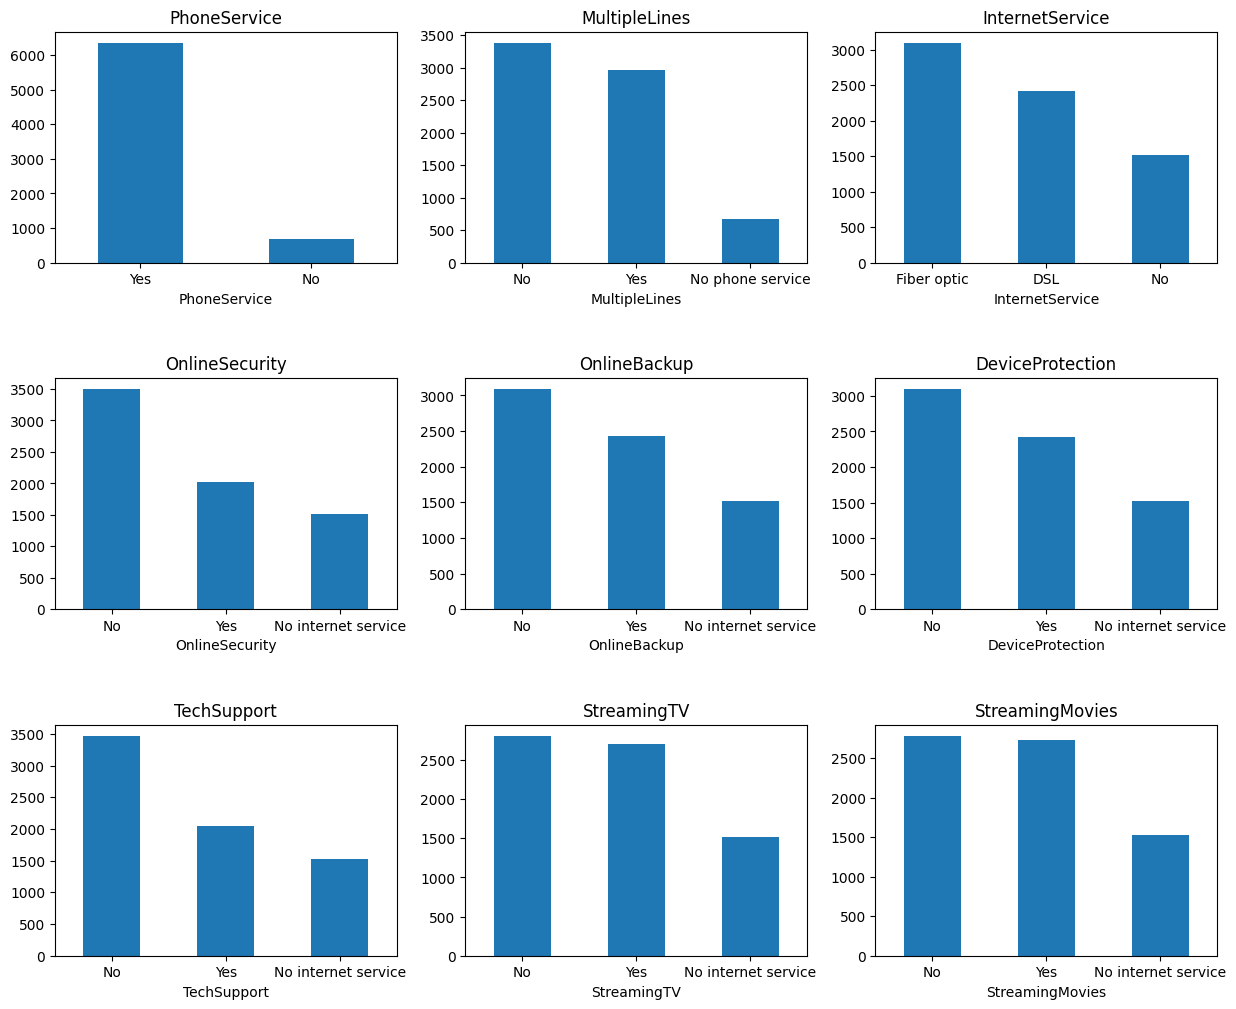

In [23]:
# Define a list of service-related columns to analyze
services = [
    'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
    'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Create a grid of subplots: 3 rows × 3 columns (total 9 plots)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))

# Adjust the vertical spacing between the subplots for better layout
plt.subplots_adjust(hspace=0.5)

# Loop through each service to create an individual bar chart
for i, item in enumerate(services):
    row, col = divmod(i, 3)  # Determine subplot position (row, column) based on index

    # Plot bar chart showing the count of customers for each category (Yes/No, DSL/Fiber, etc.)
    ax = telecom_cust[item].value_counts().plot(
        kind='bar',           # Create a bar chart
        ax=axes[row, col],    # Place it on the correct subplot
        rot=0                 # Keep x-axis labels horizontal
    )

    # Set the title of the subplot to the service name
    ax.set_title(item)

    # Ensure x-axis labels (Yes/No, etc.) remain horizontal for readability
    for tick in ax.get_xticklabels():
        tick.set_rotation(0)

# Display the grid of bar plots
plt.show()

# ------------------------------------------------------------------------------
# SUMMARY:
# This code creates a 3×3 grid of bar charts to visualize how many customers use
# different telecom services. Each subplot represents one service feature (e.g.,
# InternetService, TechSupport, StreamingTV, etc.) and shows the count of customers
# for each category (e.g., Yes/No or DSL/Fiber).
# This visualization provides an overall view of service adoption patterns among customers.
# ------------------------------------------------------------------------------


### D) Relation Between Monthly & Total Charges

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

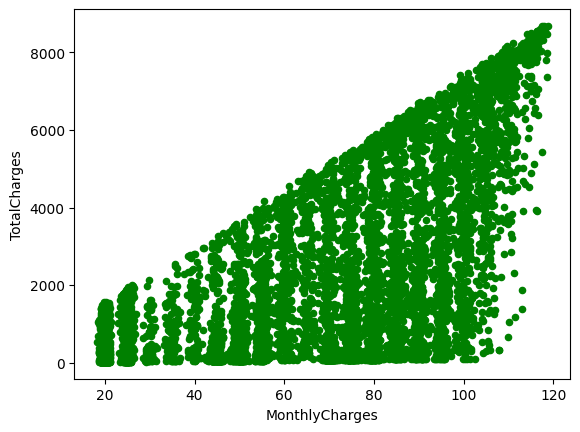

In [24]:
telecom_cust[['MonthlyCharges', 'TotalCharges']].plot.scatter(x = 'MonthlyCharges',
                                                              y='TotalCharges', color = 'green')

# ----->

 Total charges increases as the monthly bill for a customer increases.

### E) Relationship between idependent variable (Churn) & other important variables

-------------------------------------------------------------------------------------------------

1) Churn rate with Customer

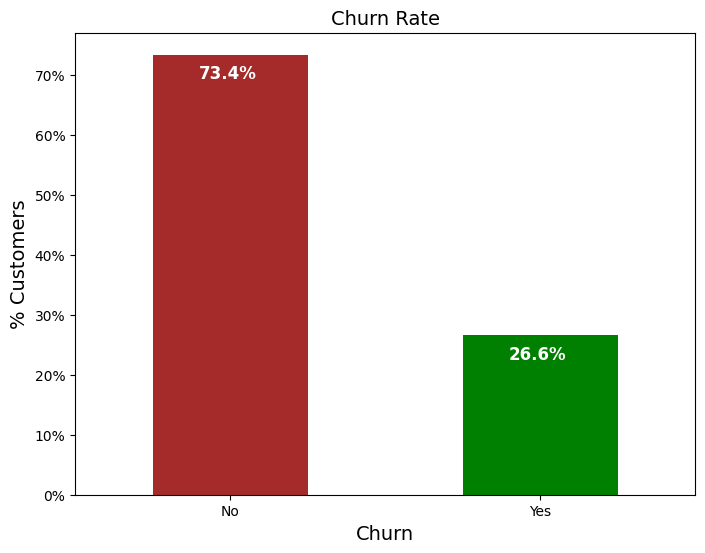

In [25]:
# Define custom colors for the churn status bars
colors = ['brown', 'green']

# Create a bar chart showing the percentage of customers who churned vs. did not churn
ax = (telecom_cust['Churn'].value_counts() * 100.0 / len(telecom_cust)).plot(
    kind='bar',       # Specify a bar chart
    stacked=True,     # Stack bars (though only one variable, for consistency)
    rot=0,            # Keep x-axis labels horizontal
    color=colors,     # Apply custom colors
    figsize=(8, 6)    # Set figure size
)

# Format y-axis to display percentages
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Label the y-axis to represent percentage of customers
ax.set_ylabel('% Customers', size=14)

# Label the x-axis to indicate Churn status (Yes/No)
ax.set_xlabel('Churn', size=14)

# Add a title to the chart
ax.set_title('Churn Rate', size=14)

# ----------------------- Add percentage labels to each bar -----------------------

# Create an empty list to store bar widths (not essential for this plot but included for reference)
totals = []

# Loop through each bar (patch) and append its width to the totals list
for i in ax.patches:
    totals.append(i.get_width())

# Compute the sum of all bar widths (again, not directly used here for bar height comparison)
total = sum(totals)

# Add text labels inside each bar to show the percentage value
for i in ax.patches:
    # Position and format each label
    ax.text(
        i.get_x() + 0.15,             # X-position: slightly inside the bar
        i.get_height() - 4.0,         # Y-position: near the top of the bar
        str(round((i.get_height() / total), 1)) + '%',  # Text label showing percentage
        fontsize=12,                  # Font size
        color='white',                # White text for contrast
        weight='bold'                 # Bold for emphasis
    )

# ------------------------------------------------------------------------------
# SUMMARY:
# This code visualizes the churn rate of telecom customers as a percentage-based bar chart.
# It calculates how many customers churned ("Yes") and did not churn ("No"),
# converts those counts into percentages, and plots them as bars.
# Each bar represents one churn category and includes a percentage label for clarity.
# The chart provides a quick overview of customer retention vs. loss.
# ------------------------------------------------------------------------------


#

2. Churn rate by ------> tenure, seniority, contract type, monthly charges and total charges
-
2.1. Churn vs Tenure

<Axes: xlabel='Churn', ylabel='tenure'>

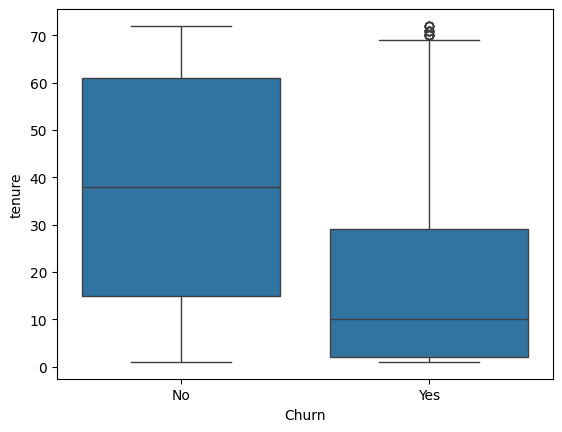

In [26]:
sns.boxplot(x = telecom_cust.Churn, y = telecom_cust.tenure)

# ----->

The customers who do not churn, they tend to stay for a longer tenure with the telecom company.

#
- 2.2 Churn by Contract Type

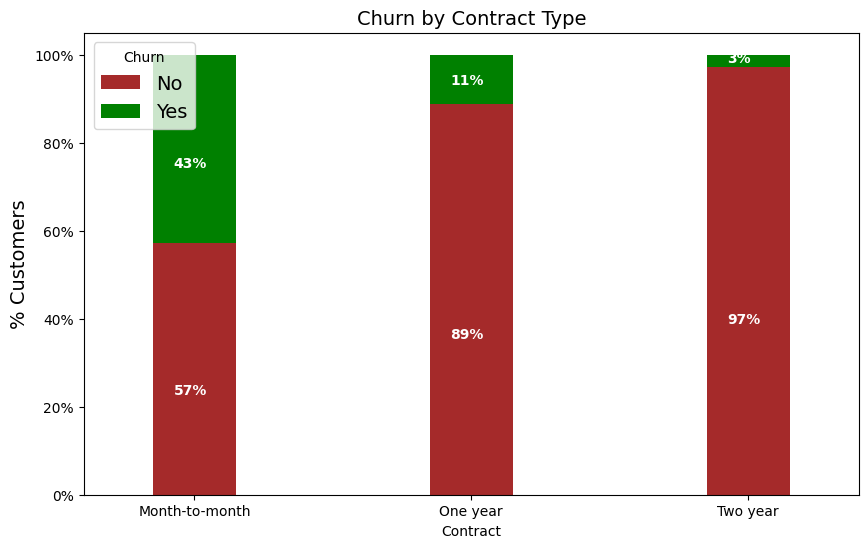

In [27]:
# Define colors for churn categories (e.g., orange = No, brown = Yes)
# colors = ['orange', 'brown']

# Group the dataset by 'Contract' type and 'Churn' status, then count the number of customers in each group
contract_churn = telecom_cust.groupby(['Contract', 'Churn']).size().unstack()

# Calculate the churn percentages for each contract type and plot a stacked bar chart
ax = (contract_churn.T * 100.0 / contract_churn.T.sum()).T.plot(
    kind='bar',          # Create a bar chart
    width=0.3,           # Set bar width
    stacked=True,        # Stack bars to show churn vs. non-churn within each contract type
    rot=0,               # Keep x-axis labels horizontal
    figsize=(10, 6),     # Set figure size
    color=colors         # Apply custom colors
)

# Format the y-axis to show percentages
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Position and style the legend
ax.legend(loc='best', prop={'size': 14}, title='Churn')

# Label the y-axis
ax.set_ylabel('% Customers', size=14)

# Add a descriptive title to the chart
ax.set_title('Churn by Contract Type', size=14)

# -------------------- Add percentage labels to each stacked bar section --------------------
for p in ax.patches:
    width, height = p.get_width(), p.get_height()  # Get the size of each bar segment
    x, y = p.get_xy()                              # Get the position of each bar segment

    # Place text labels showing percentage values inside the bar sections
    ax.annotate(
        '{:.0f}%'.format(height),                  # Format height as an integer percentage
        (p.get_x() + 0.25 * width, p.get_y() + 0.4 * height),  # Label position
        color='white',                             # White text for contrast
        weight='bold',                             # Bold text for visibility
        size=10                                    # Font size
    )

# ------------------------------------------------------------------------------
# SUMMARY:
# This code visualizes customer churn rates by contract type using a stacked bar chart.
# It groups customers by 'Contract' and 'Churn' status, calculates the percentage of churners
# and non-churners within each contract type, and plots them together for comparison.
# Each bar represents one contract type (Month-to-month, One year, Two year),
# divided into sections for churned vs. retained customers. Percentage labels are
# added to show the exact proportions, helping to analyze which contract types
# have higher or lower churn rates.
# ------------------------------------------------------------------------------


# ----->
The customers who have a month to month contract have a very high churn rate.

#
- 2.3 Churn by Seniority

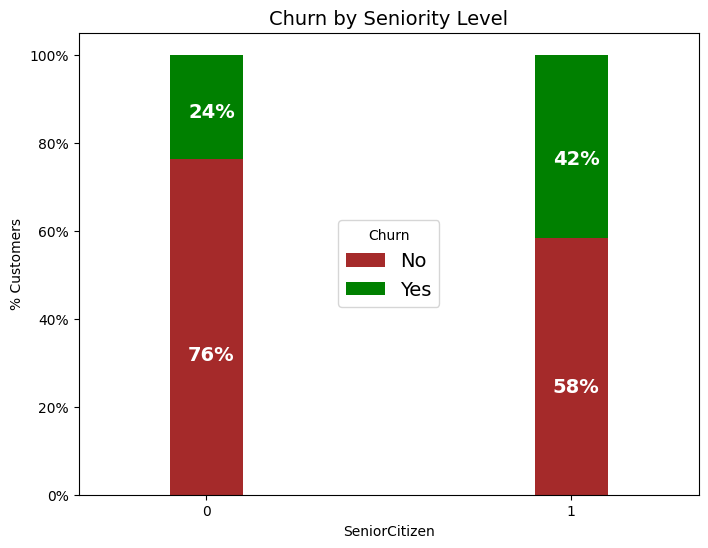

In [28]:
# Define colors for churn categories (e.g., brown = Churned, green = Retained)
colors = ['brown', 'green']

# Group data by 'SeniorCitizen' and 'Churn', counting the number of customers in each group
seniority_churn = telecom_cust.groupby(['SeniorCitizen', 'Churn']).size().unstack()

# Calculate the percentage of churners and non-churners within each seniority level
# and create a stacked bar chart to visualize it
ax = (seniority_churn.T * 100.0 / seniority_churn.T.sum()).T.plot(
    kind='bar',       # Create a bar chart
    width=0.2,        # Narrower bars for better spacing
    stacked=True,     # Stack churn and non-churn values in one bar
    rot=0,            # Keep x-axis labels horizontal
    figsize=(8, 6),   # Set chart size
    color=colors      # Apply color scheme
)

# Format the y-axis to display percentages
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Add a legend showing churn categories
ax.legend(loc='center', prop={'size': 14}, title='Churn')

# Label the y-axis to indicate percentages
ax.set_ylabel('% Customers')

# Add a title to the chart
ax.set_title('Churn by Seniority Level', size=14)

# -------------------- Add percentage labels inside each bar section --------------------
for p in ax.patches:
    width, height = p.get_width(), p.get_height()  # Get bar dimensions
    x, y = p.get_xy()                              # Get bar position

    # Add formatted percentage label within each section of the stacked bar
    ax.annotate(
        '{:.0f}%'.format(height),                  # Round percentage to nearest integer
        (p.get_x() + 0.25 * width, p.get_y() + 0.4 * height),  # Label placement
        color='white',                             # White text for contrast
        weight='bold',                             # Bold font for readability
        size=14                                    # Font size
    )

# ------------------------------------------------------------------------------
# SUMMARY:
# This code visualizes customer churn rates by seniority level (SeniorCitizen: Yes/No).
# It groups the telecom dataset by 'SeniorCitizen' and 'Churn' status, computes the
# percentage of churners and non-churners within each group, and displays the results
# as a stacked bar chart. Each bar represents senior vs. non-senior customers, divided
# into segments showing churn and retention percentages.
# This helps identify whether senior citizens have a higher or lower churn rate compared
# to younger customers.
# ------------------------------------------------------------------------------


# ------>

Senior Citizens have almost double the churn rate than younger population.

#

- 2.4 Churn by Monthly Charges

Text(0.5, 1.0, 'Distribution of Monthly Charges by Churn')

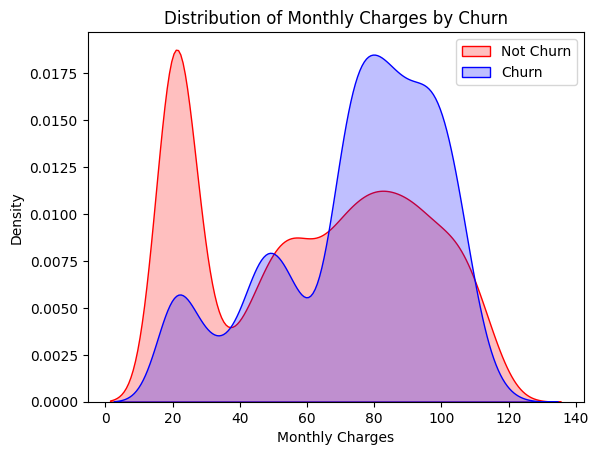

In [29]:
# Plot the distribution of Monthly Charges for customers who did NOT churn
ax = sns.kdeplot(
    telecom_cust.MonthlyCharges[(telecom_cust["Churn"] == 'No')],  # Monthly charges for non-churned customers
    color="Red",        # Set the color for the curve
    shade=True          # Fill the area under the curve for better visibility
)

# Overlay the distribution of Monthly Charges for customers who churned
ax = sns.kdeplot(
    telecom_cust.MonthlyCharges[(telecom_cust["Churn"] == 'Yes')],  # Monthly charges for churned customers
    ax=ax,              # Plot on the same axis as the previous curve
    color="Blue",       # Set a different color for the churned group
    shade=True          # Fill the area under the curve
)

# Add a legend to differentiate between churned and non-churned customers
ax.legend(["Not Churn", "Churn"], loc='upper right')

# Label the y-axis to indicate density (probability distribution)
ax.set_ylabel('Density')

# Label the x-axis to represent monthly charges
ax.set_xlabel('Monthly Charges')

# Add a descriptive title to the plot
ax.set_title('Distribution of Monthly Charges by Churn')

# ------------------------------------------------------------------------------
# SUMMARY:
# This code uses Kernel Density Estimation (KDE) plots to compare the distribution
# of monthly charges between customers who churned and those who did not.
# Two overlapping curves (red for non-churn, blue for churn) show how the likelihood
# of churn varies across different billing amounts.
# Typically, customers with higher monthly charges are more likely to churn,
# which can be observed if the blue curve shifts toward higher values.
# ------------------------------------------------------------------------------


# ----->

Higher % of customers churn when the monthly charges are high.

#
- 2.5 Churn by Total Charges

Text(0.5, 1.0, 'Distribution of Total Charges by Churn')

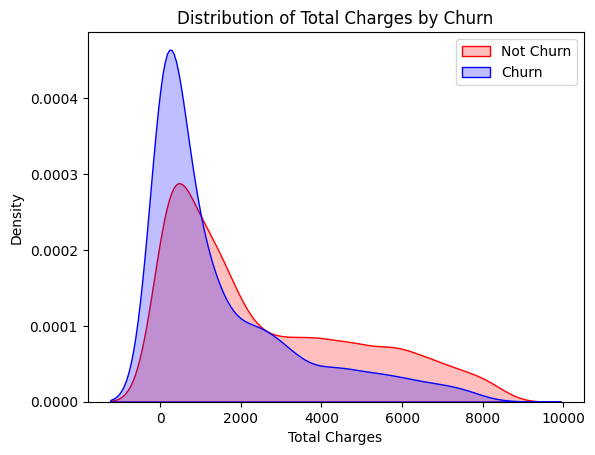

In [30]:
# Plot the distribution of Total Charges for customers who did NOT churn
ax = sns.kdeplot(
    telecom_cust.TotalCharges[(telecom_cust["Churn"] == 'No')],  # Total charges for non-churned customers
    color="Red",      # Use red color for non-churn group
    shade=True        # Fill the area under the KDE curve
)

# Overlay the distribution of Total Charges for customers who churned
ax = sns.kdeplot(
    telecom_cust.TotalCharges[(telecom_cust["Churn"] == 'Yes')],  # Total charges for churned customers
    ax=ax,             # Plot on the same axes as the previous curve
    color="Blue",      # Use blue color for churned group
    shade=True         # Fill the area under the KDE curve
)

# Add a legend to distinguish between churned and non-churned customers
ax.legend(["Not Churn", "Churn"], loc='upper right')

# Label the y-axis to indicate density (probability distribution)
ax.set_ylabel('Density')

# Label the x-axis to represent total charges
ax.set_xlabel('Total Charges')

# Add a title describing the chart
ax.set_title('Distribution of Total Charges by Churn')

# ------------------------------------------------------------------------------
# SUMMARY:
# This code visualizes how total charges differ between customers who churned
# and those who stayed. It uses Kernel Density Estimation (KDE) plots to show
# the probability distribution of TotalCharges for both groups.
# The red curve represents customers who did not churn, and the blue curve
# represents those who did churn.
#
# Typically, churned customers (blue) tend to have lower total charges,
# indicating they might have left the service earlier, while non-churned
# customers (red) have higher total charges because of longer tenure.
# ------------------------------------------------------------------------------


# ----->

There is higer churn when the total charges are lower.

## Step 4: Predictive modeling - ML Algorithms

--------------------------------------------------------------------------------------------------------
Developing
- Logistic Regression,
- Random Forest,
- SVM,
- ADA Boost and
- XG Boost

and compare them

### 1. Logistic Regresson

In [31]:
# We will use the data frame where we had created dummy variables
# 'df_dummies' contains all features converted into numeric form (dummy/encoded variables)

# Separate the target variable (y) and the independent variables (X)
y = df_dummies['Churn'].values                      # Target variable: Churn (Yes/No as 1/0)
X = df_dummies.drop(columns=['Churn'])              # Feature set: all other columns except 'Churn'

# ------------------------- Scaling the Features -------------------------

# Import MinMaxScaler to normalize data into a fixed range (0 to 1)
from sklearn.preprocessing import MinMaxScaler

# Get the list of feature column names
features = X.columns.values

# Initialize the scaler to scale features between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit the scaler on the dataset (learn min and max values for each feature)
scaler.fit(X)

# Transform (scale) the dataset using the fitted scaler
X = pd.DataFrame(scaler.transform(X))

# Reassign original feature names to the scaled DataFrame
X.columns = features

# ------------------------------------------------------------------------------
# SUMMARY:
# This code prepares the dataset for machine learning modeling by:
# 1. Separating the target variable 'Churn' from the features.
# 2. Applying Min-Max scaling to all features to normalize their values
#    between 0 and 1. This ensures that no feature dominates due to differing
#    scales or units (important for algorithms like logistic regression,
#    k-nearest neighbors, and neural networks).
#
# After this step:
# - 'X' contains normalized feature values (0 to 1 range)
# - 'y' contains churn labels (0 or 1)
# ------------------------------------------------------------------------------


In [32]:
# Create Train & Test Data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [33]:
# Running logistic regression model

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

In [34]:
from sklearn import metrics
prediction_test = model.predict(X_test)

# Print the prediction accuracy

print (metrics.accuracy_score(y_test, prediction_test))

0.8075829383886256


Axes(0.125,0.11;0.775x0.77)


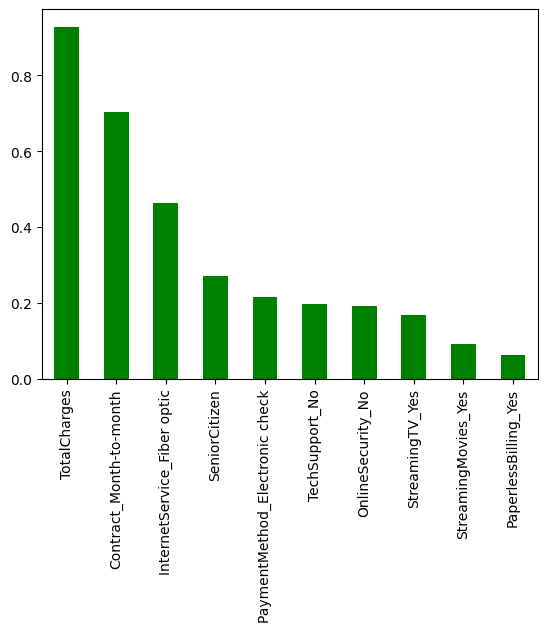

In [35]:
# To get the weights (coefficients) of all the variables from the trained model

# Create a pandas Series of model coefficients
# model.coef_[0] gives the weight (impact) of each feature on the target variable (Churn)
# X.columns.values are used as index labels to match coefficients with feature names
weights = pd.Series(model.coef_[0], index=X.columns.values)

# Print and plot the top 10 features with the highest positive impact on churn
# Sorting in descending order to show the features that most increase churn probability
print(
    weights.sort_values(ascending=False)[:10].plot(
        kind='bar',      # Bar chart for visualization
        color='green'    # Green bars for positive correlation
    )
)

# ------------------------------------------------------------------------------
# SUMMARY:
# This code visualizes the top 10 features that have the strongest positive
# influence on customer churn, based on the model's learned coefficients.
#
# - `model.coef_` gives the linear weights assigned to each feature by the model
#   (commonly used in Logistic Regression or Linear Regression).
# - Positive coefficients → Increase the likelihood of churn.
# - Negative coefficients → Decrease the likelihood of churn.
#
# The resulting bar chart helps identify which customer attributes are most
# strongly associated with churn, guiding targeted retention strategies.
# ------------------------------------------------------------------------------


Axes(0.125,0.11;0.775x0.77)


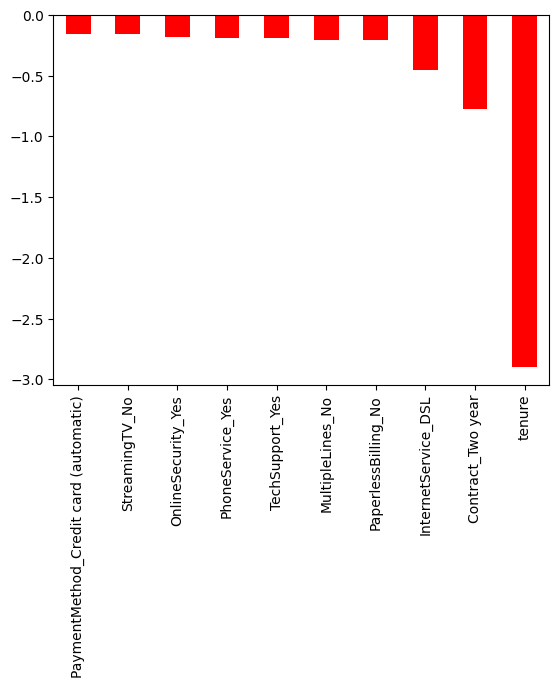

In [36]:
# Plot the 10 features with the lowest (most negative) weights from the model

# Sort the feature weights in ascending order (lowest values last)
# Then, select the bottom 10 features — these have the strongest negative impact on churn
print(
    weights.sort_values(ascending=False)[-10:].plot(
        kind='bar',    # Use a bar chart for visualization
        color='red'    # Use red color to indicate negative association with churn
    )
)

# ------------------------------------------------------------------------------
# SUMMARY:
# This code identifies and visualizes the 10 features with the **most negative**
# coefficients (weights) in the model.
#
# - Negative coefficients mean that as the feature value increases,
#   the probability of churn **decreases**.
# - These features are typically associated with **customer retention or loyalty**.
#
# The bar chart shows which variables have the strongest **protective effect**
# against churn (e.g., longer tenure, certain contract types, or bundled services).
#
# Together with the previous plot (positive weights in green),
# this gives a complete picture of what drives or prevents customer churn.
# ------------------------------------------------------------------------------


#### Observations - LR

Some variable has positive & some negative relation with Predictive Variable (Churn)

- In EDA, having two month contracts reduces chance of Churn. That means it has negative relation with Churn.
- DSL internet also reduces the the probability of churn.
- total charges, monthly contracts, fibre optic internet services and seniority can lead to higher churn rates.

### 2. Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
model_rf = RandomForestClassifier(n_estimators=1000, oob_score=True, n_jobs=-1, random_state=50, max_leaf_nodes=30)
model_rf.fit(X_train, y_train)

# Make predictions

prediction_test = model_rf.predict(X_test)
print(metrics.accuracy_score(y_test, prediction_test))

0.8088130774697939


<Axes: >

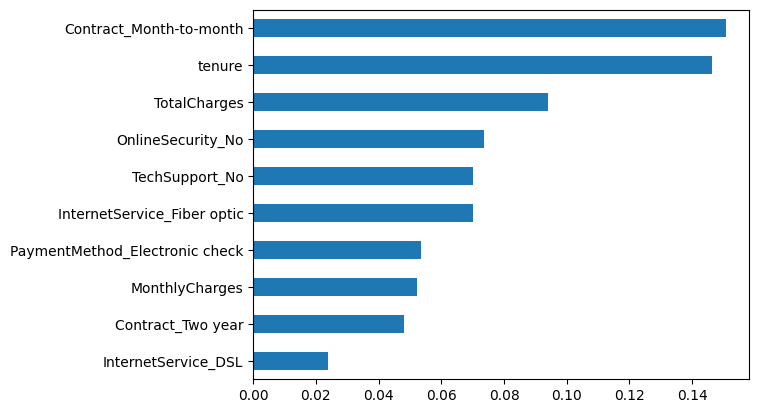

In [38]:
importances = model_rf.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')

#### Observations - Random Forest

- Monthly contract, tenure and total charges are the most important predictor variables to predict churn.
- The results from random forest are very similar to that of the logistic regression and in line to what we had expected from our EDA

### 3. Support Vecor Machine (SVM)

In [39]:
# Split the dataset into training and testing sets

# X  -> feature variables (scaled)
# y  -> target variable ('Churn')
# test_size=0.2  -> 20% of the data will be used for testing, and 80% for training
# random_state=99  -> ensures reproducibility (the same random split every time)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

# ------------------------------------------------------------------------------
# SUMMARY:
# This code splits the dataset into two parts:
# 1. **Training set (80%)** – Used to train the machine learning model.
# 2. **Testing set (20%)** – Used to evaluate how well the model generalizes to unseen data.
#
# Setting a `random_state` ensures that the data split remains consistent
# every time the code runs, which is essential for reproducible results.
#
# After this step:
# - X_train, y_train → used for model training.
# - X_test, y_test → used for model evaluation.
# ------------------------------------------------------------------------------


In [40]:
# Import the Support Vector Machine (SVM) classifier from scikit-learn
from sklearn.svm import SVC

# Create an instance of the SVM model with a linear kernel
# 'linear' kernel means the model will find a straight-line (or hyperplane)
# that best separates the churn vs. non-churn customers
model.svm = SVC(kernel='linear')

# Train (fit) the SVM model using the training data
# The model learns the optimal hyperplane that separates classes based on X_train and y_train
model.svm.fit(X_train, y_train)

# Use the trained model to make predictions on the test data
preds = model.svm.predict(X_test)

# Evaluate the model's accuracy by comparing predicted vs actual labels
metrics.accuracy_score(y_test, preds)

# ------------------------------------------------------------------------------
# SUMMARY:
# This code builds and evaluates a Support Vector Machine (SVM) classifier
# to predict customer churn.
#
# Steps performed:
# 1. Import and initialize an SVM model with a **linear kernel**.
# 2. Fit the model using the training data (`X_train`, `y_train`).
# 3. Predict churn outcomes for the test set (`X_test`).
# 4. Measure how accurate the predictions are using `accuracy_score`.
#
# An SVM with a linear kernel works well when the data is linearly separable,
# and it is effective for binary classification problems like churn prediction.
# ------------------------------------------------------------------------------


0.820184790334044

In [41]:
# Create and display the Confusion Matrix

# Import metrics for model evaluation
from sklearn.metrics import classification_report, confusion_matrix

# Generate the confusion matrix using the true labels (y_test) and predicted labels (preds)
print(confusion_matrix(y_test, preds))

# ------------------------------------------------------------------------------
# SUMMARY:
# A **confusion matrix** is a key evaluation tool for classification models.
# It shows how many predictions were correct and how many were misclassified.
#
# The matrix structure for binary classification (like churn prediction) is:
#
#                Predicted: No   |   Predicted: Yes
# Actual: No    →  True Negative (TN)  |  False Positive (FP)
# Actual: Yes   →  False Negative (FN) |  True Positive (TP)
#
# Interpretation:
# - **TN** → Correctly predicted customers who did NOT churn
# - **TP** → Correctly predicted customers who churned
# - **FP** → Incorrectly predicted churn (customer actually stayed)
# - **FN** → Missed churn (customer actually left)
#
# The confusion matrix helps identify where the model is making mistakes and
# whether it’s better at detecting churn or non-churn cases.
# ------------------------------------------------------------------------------


[[953  89]
 [164 201]]


<Axes: >

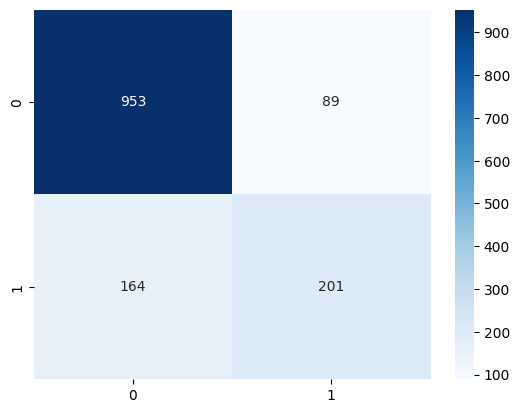

In [42]:
sns.heatmap(confusion_matrix(y_test, preds), annot=True, fmt='d', cmap='Blues')


<Axes: xlabel='gender', ylabel='count'>

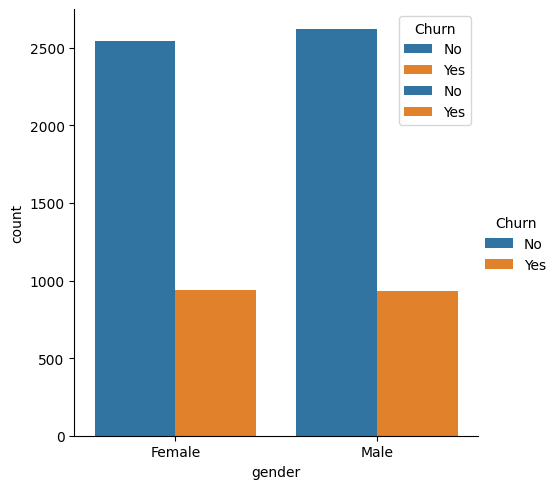

In [43]:
# Create a categorical plot (count plot) to visualize churn distribution by gender

ax1 = sns.catplot(
    x="gender",          # Categorical variable on the x-axis (Male/Female)
    kind="count",        # Plot type: count (bar plot showing count of observations)
    hue="Churn",         # Use different colors for churned vs. non-churned customers
    data=telecom_cust,   # Source DataFrame
    estimator=lambda x: sum(x == 0) * 100.0 / len(x)  # Attempt to calculate churn rate percentage (but not applicable for countplot)
)

# ------------------------------------------------------------------------------
# SUMMARY:
# This code uses Seaborn's **catplot()** to create a grouped bar chart
# showing how customer churn varies by gender.
#
# - `x="gender"` places gender categories (Male/Female) on the x-axis.
# - `hue="Churn"` splits each gender group into churned (Yes) and non-churned (No).
# - `kind="count"` counts the number of observations in each category.
# - `data=telecom_cust` specifies the source DataFrame.
#
# ⚠️ Note:
# The `estimator` parameter is **not used** with `kind="count"` plots —
# it only applies to plots like `bar`, `point`, or `box`.
# So, this line won’t correctly calculate churn percentages here.
# If you want to plot percentages instead of raw counts,
# you should use a `barplot` with computed churn rates.
# ------------------------------------------------------------------------------

# ✅ Correct version to plot churn distribution by gender (in counts):
sns.countplot(x="gender", hue="Churn", data=telecom_cust)

# ✅ If you want to show percentages instead of counts:
# gender_churn = telecom_cust.groupby(['gender', 'Churn']).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).reset_index(name='Percentage')
# sns.barplot(x='gender', y='Percentage', hue='Churn', data


#### Observation
- Wth SVM, the accuracy is increased to upto 82%.

### 4. ADA Boost

In [44]:
# ------------------------ AdaBoost Algorithm ------------------------

# Import the AdaBoost classifier from scikit-learn's ensemble module
from sklearn.ensemble import AdaBoostClassifier

# Create an instance of the AdaBoost model
# By default:
# - n_estimators = 50  → The number of weak learners (base models)
# - base_estimator = DecisionTreeClassifier(max_depth=1)  → Weak decision stumps
model = AdaBoostClassifier()

# Train (fit) the AdaBoost model on the training data
# The algorithm builds an ensemble of weak learners sequentially,
# where each new model focuses more on the misclassified cases from previous ones.
model.fit(X_train, y_train)

# Make predictions on the test data
preds = model.predict(X_test)

# Evaluate the model’s accuracy by comparing predictions with actual values
metrics.accuracy_score(y_test, preds)

# ------------------------------------------------------------------------------
# SUMMARY:
# This code builds, trains, and evaluates an **AdaBoost (Adaptive Boosting) classifier**
# to predict customer churn.
#
# Steps:
# 1. Initialize the AdaBoost model using default parameters.
# 2. Train it on the training set (X_train, y_train).
# 3. Predict churn outcomes on the test set.
# 4. Measure accuracy using `metrics.accuracy_score()`.
#
# ✅ **How AdaBoost Works:**
# - It combines multiple weak models (e.g., shallow decision trees) into one strong model.
# - Each subsequent model corrects the errors made by the previous ones.
# - Data points that were misclassified earlier get higher weights in the next iteration.
#
# ⚙️ **Default parameters:**
# - `n_estimators=50`: number of boosting rounds.
# - `learning_rate=1.0`: controls the contribution of each classifier.
# - `base_estimator=DecisionTreeClassifier(max_depth=1)`: defines the weak learner.
#
# 🚀 **Result:** The final accuracy score shows how well AdaBoost predicts churn.
# ------------------------------------------------------------------------------


0.8166311300639659

In [45]:
AdaBoostClassifier(n_estimators=100, learning_rate=0.5, random_state=42)


AdaBoostClassifier(learning_rate=0.5, n_estimators=100, random_state=42)

### 5. XG Boost

In [46]:
# ------------------------ XGBoost Algorithm ------------------------

# Import the XGBoost Classifier
from xgboost import XGBClassifier

# Create an instance of the XGBoost model with default parameters
# XGBoost (Extreme Gradient Boosting) is a powerful, efficient gradient boosting algorithm
model = XGBClassifier()

# Train (fit) the XGBoost model using the training dataset
# The algorithm builds an ensemble of decision trees in sequence,
# optimizing each new tree to correct the errors made by the previous ones
model.fit(X_train, y_train)

# Predict the target variable (churn) on the test data
preds = model.predict(X_test)

# Evaluate the model’s prediction accuracy by comparing with actual test labels
metrics.accuracy_score(y_test, preds)

# ------------------------------------------------------------------------------
# SUMMARY:
# This code builds, trains, and evaluates an **XGBoost classifier** for churn prediction.
#
# Steps performed:
# 1. Import the `XGBClassifier` from the XGBoost library.
# 2. Initialize the model using default parameters.
# 3. Train the model on the training set (`X_train`, `y_train`).
# 4. Predict churn outcomes on the test set (`X_test`).
# 5. Evaluate accuracy using `metrics.accuracy_score()`.
#
# ✅ **About XGBoost:**
# - XGBoost stands for **Extreme Gradient Boosting**, known for speed and performance.
# - It uses gradient boosting with regularization (L1 & L2) to prevent overfitting.
# - It automatically handles missing values and supports parallel computation.
#
# ⚙️ **Default parameters include:**
# - `n_estimators=100`: number of boosting rounds
# - `learning_rate=0.1`: step size shrinkage
# - `max_depth=3`: maximum depth of individual trees
# - `booster='gbtree'`: type of base learner
#
# 🚀 **Result:** The accuracy score indicates how well the model predicts customer churn.
# ------------------------------------------------------------------------------


0.8009950248756219

In [47]:
XGBClassifier(n_estimators=200, learning_rate=0.05, max_depth=5, random_state=42)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, ...)

#### Observation
- Wth XG Boost, the accuracy is increased to upto 80%.

-XG Boost is a slow learning model and is based on the concept of Boosting.

#Teaching Guide — Deploy a Streamlit App in Google Colab (No Anaconda Needed)

Learn how to upload a machine learning model and Streamlit app, then deploy it live using Google Colab + ngrok — no installations needed.

Prerequisites (What students need)

A Google account (for Google Colab)

A free ngrok account (we’ll guide them below)

These 2 files:

churn_app.py

random_forest_model.joblib


#Step-by-Step Instructions

Step 1 – Open Google Colab

https://colab.research.google.com

Click “New Notebook”.

Rename it to Churn_App_Deployment.

You’ll now have a clean Python environment in the cloud.

Step 2 – Upload the App and Model

Step 3 – Install Required Libraries
!pip install -q streamlit pyngrok joblib scikit-learn pandas


Explain:

streamlit → runs the web app

pyngrok → creates a shareable URL

joblib → loads the trained model

pandas, scikit-learn → handle ML data


Step 4 – Create a Free ngrok Account (One-time Setup)

Visit https://dashboard.ngrok.com/signup

Sign up using Google or GitHub (free).

After signing up, go to
👉 https://dashboard.ngrok.com/get-started/your-authtoken

Copy your Authtoken — it looks like this:

2E3qP9abcXYZ123456789

This token is like a password — each student must use their own.

Step 5 – Add ngrok Token in Colab

Paste and run this cell (replace the token string with theirs):

Paste your ngrok token between the quotes
NGROK_TOKEN = "YOUR_NGROK_AUTHTOKEN_HERE"

Register ngrok token (one time per session)
!ngrok config add-authtoken $NGROK_TOKEN

print("✅ ngrok token added successfully!")


If it works:
They’ll see a message confirming the token was added.
If not, recheck that the token was pasted inside quotes.

Step 6 – Start the ngrok Tunnel
from pyngrok import ngrok

Start a tunnel from port 8501 (Streamlit’s default)
public_url = ngrok.connect(port=8501)
print("🔗 Public URL:", public_url)


What happens:
They’ll get a URL like

🔗 Public URL: NgrokTunnel: "https://abcd-1234.ngrok.io"


This will become the live web address for their app.

Step 7 – Run the Streamlit App
Start Streamlit (it will run churn_app.py)
!streamlit run churn_app.py --server.port 8501 &>/dev/null&
print("Streamlit app started! Wait 10 seconds, then open the public URL above.")


Explain:

Streamlit runs on port 8501 (the one ngrok is connected to).

&>/dev/null& runs it quietly in the background.

After ~10 seconds, students open the public URL from Step 6 in a new browser tab —
and see their Customer Churn Prediction App live!


Step 8 (Optional) – Retrain the Model

If you also want to show them how to train the model from scratch, upload churn_main.py and Telco_Customer_Churn.csv, then run:

!python churn_main.py


That script will regenerate random_forest_model.joblib, which the Streamlit app automatically uses.

#Deployment

In [49]:
from google.colab import files

# Upload the required files (choose from your computer)
uploaded = files.upload()


Saving churn_app.py to churn_app.py


In [50]:
from google.colab import files

# Upload the required files (choose from your computer)
uploaded = files.upload()


Saving churn_main.py to churn_main.py


In [51]:
from google.colab import files

# Upload the required files (choose from your computer)
uploaded = files.upload()


Saving random_forest_model.joblib to random_forest_model.joblib


In [53]:
# List the files now available in the Colab working directory (/content)
!ls


churn_app.py   random_forest_model.joblib  Telco_Customer_Churn.csv
churn_main.py  sample_data


In [54]:
# Install Streamlit and pyngrok and other dependencies
!pip install -q streamlit pyngrok joblib scikit-learn pandas


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 62.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 105.5 MB/s eta 0:00:00


In [56]:
# Downgrade scikit-learn to a compatible version
!pip install scikit-learn==1.3.2



In [57]:
# Replace the token string below with your ngrok authtoken (keep the quotes)
NGROK_TOKEN = "35BUk522kf6b0lL3Xxs3V2t8ssV_2GJDyLYYvpumcmiXBMZ7K"

# Save/install the authtoken into the ngrok config in this Colab VM
!ngrok config add-authtoken $NGROK_TOKEN

# Show a confirmation message
print("ngrok authtoken configured. Proceed to start the tunnel.")


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml
ngrok authtoken configured. Proceed to start the tunnel.


In [58]:
from pyngrok import ngrok

# --- Clean up any previous ngrok sessions ---
try:
    ngrok.kill()  # terminates all existing tunnels
except Exception as e:
    print("Cleanup warning:", e)

# --- Start a new tunnel on port 8501 (Streamlit default) ---
try:
    public_tunnel = ngrok.connect(addr=8501, bind_tls=True)
    print("\n✅ Ngrok tunnel established successfully!")
    print("🌐 Open this URL in your browser:\n", public_tunnel.public_url)
except Exception as e:
    print("\n❌ Failed to start ngrok tunnel:", e)
    print("Tip: If the problem persists, restart your runtime or upgrade your ngrok plan.")



✅ Ngrok tunnel established successfully!
🌐 Open this URL in your browser:
 https://mutteringly-prosperous-anton.ngrok-free.dev


In [59]:
from pyngrok import ngrok, conf

# Optional: print ngrok version for debugging
!ngrok version

# Open a tunnel to the Streamlit default port 8501
public_tunnel = ngrok.connect(addr=8501, bind_tls=True)
print("Open this URL in your browser to view the app:\n", public_tunnel.public_url)


ngrok version 3.32.0
pyngrok version 7.4.1
Open this URL in your browser to view the app:
 https://mutteringly-prosperous-anton.ngrok-free.dev


In [60]:
# Run Streamlit app in the background on port 8501
# The &>/dev/null& keeps it running in background silently
!streamlit run churn_app.py --server.port 8501 &>/dev/null&

print("Streamlit started. Wait ~5-10 seconds, then open the public URL shown earlier.")


Streamlit started. Wait ~5-10 seconds, then open the public URL shown earlier.


#YouTube Video References

Link: https://www.youtube.com/watch?v=dkvgzL3gJVY


##Day 2
